In [58]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

data_cities = pd.read_csv("./gayCities.csv", index_col="code")

geodata_burbs = gpd.read_file("./SAL_2021_AUST_GDA2020_SHP.zip").iloc[:, [0, 1, 6, 10]]
geodata_burbs.columns = ["code", "name", "area", "geometry"]
geodata_burbs = geodata_burbs[geodata_burbs["area"] > 0][["code", "name", "geometry"]]
geodata_burbs["code"] = geodata_burbs["code"].astype("int")
geodata_burbs.set_index("code", inplace=True)
geodata_burbs

,name,geometry
code,,
10001,Aarons Pass,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8..."
10002,Abbotsbury,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
10003,Abbotsford (NSW),"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
10004,Abercrombie,"POLYGON ((149.55192 -33.39280, 149.55148 -33.3..."
10005,Abercrombie River,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9..."
...,...,...
90001,Christmas Island,"POLYGON ((105.68561 -10.41639, 105.68563 -10.4..."
90002,Home Island,"MULTIPOLYGON (((96.87908 -12.20190, 96.87904 -..."
90003,Jervis Bay,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."


In [72]:
data_burbs = pd.read_csv("gayburbs.csv", index_col="code")
data_burbs = data_burbs[data_burbs["total couples"] > 49]
data_burbs.index = [int(code[3:]) for code in data_burbs.index]
data_burbs.index.name = "code"
data_burbs["gay"] = data_burbs["male couples"] / data_burbs["total couples"]
data_burbs["lesbian"] = data_burbs["female couples"] / data_burbs["total couples"]
data_burbs["same-sex"] = data_burbs["gay"] + data_burbs["lesbian"]
data_burbs = data_burbs[["name", "gay", "lesbian", "same-sex"]]
data_burbs

,name,gay,lesbian,same-sex
code,,,,
10002,Abbotsbury,0.004049,0.000000,0.004049
10003,Abbotsford (NSW),0.005271,0.012048,0.017319
10004,Abercrombie,0.014815,0.000000,0.014815
10006,Aberdare,0.014286,0.012245,0.026531
10007,Aberdeen (NSW),0.000000,0.012526,0.012526
...,...,...,...,...
80135,Wright,0.008000,0.011429,0.019429
80136,Yarralumla,0.009828,0.007371,0.017199
90001,Christmas Island,0.000000,0.000000,0.000000


In [76]:
mapdata_burbs = gpd.GeoDataFrame(data=data_burbs)
mapdata_burbs["geometry"] = [geodata_burbs.at[code, "geometry"] for code in mapdata_burbs.index]
mapdata_burbs

,name,gay,lesbian,same-sex,geometry
code,,,,,
10002,Abbotsbury,0.004049,0.000000,0.004049,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
10003,Abbotsford (NSW),0.005271,0.012048,0.017319,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
10004,Abercrombie,0.014815,0.000000,0.014815,"POLYGON ((149.55192 -33.39280, 149.55148 -33.3..."
10006,Aberdare,0.014286,0.012245,0.026531,"POLYGON ((151.37454 -32.83794, 151.37678 -32.8..."
10007,Aberdeen (NSW),0.000000,0.012526,0.012526,"POLYGON ((150.94790 -32.17615, 150.94816 -32.1..."
...,...,...,...,...,...
80135,Wright,0.008000,0.011429,0.019429,"POLYGON ((149.03402 -35.31617, 149.03435 -35.3..."
80136,Yarralumla,0.009828,0.007371,0.017199,"POLYGON ((149.10725 -35.31232, 149.10611 -35.3..."
90001,Christmas Island,0.000000,0.000000,0.000000,"POLYGON ((105.68561 -10.41639, 105.68563 -10.4..."


ValueError: Format 'jps' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

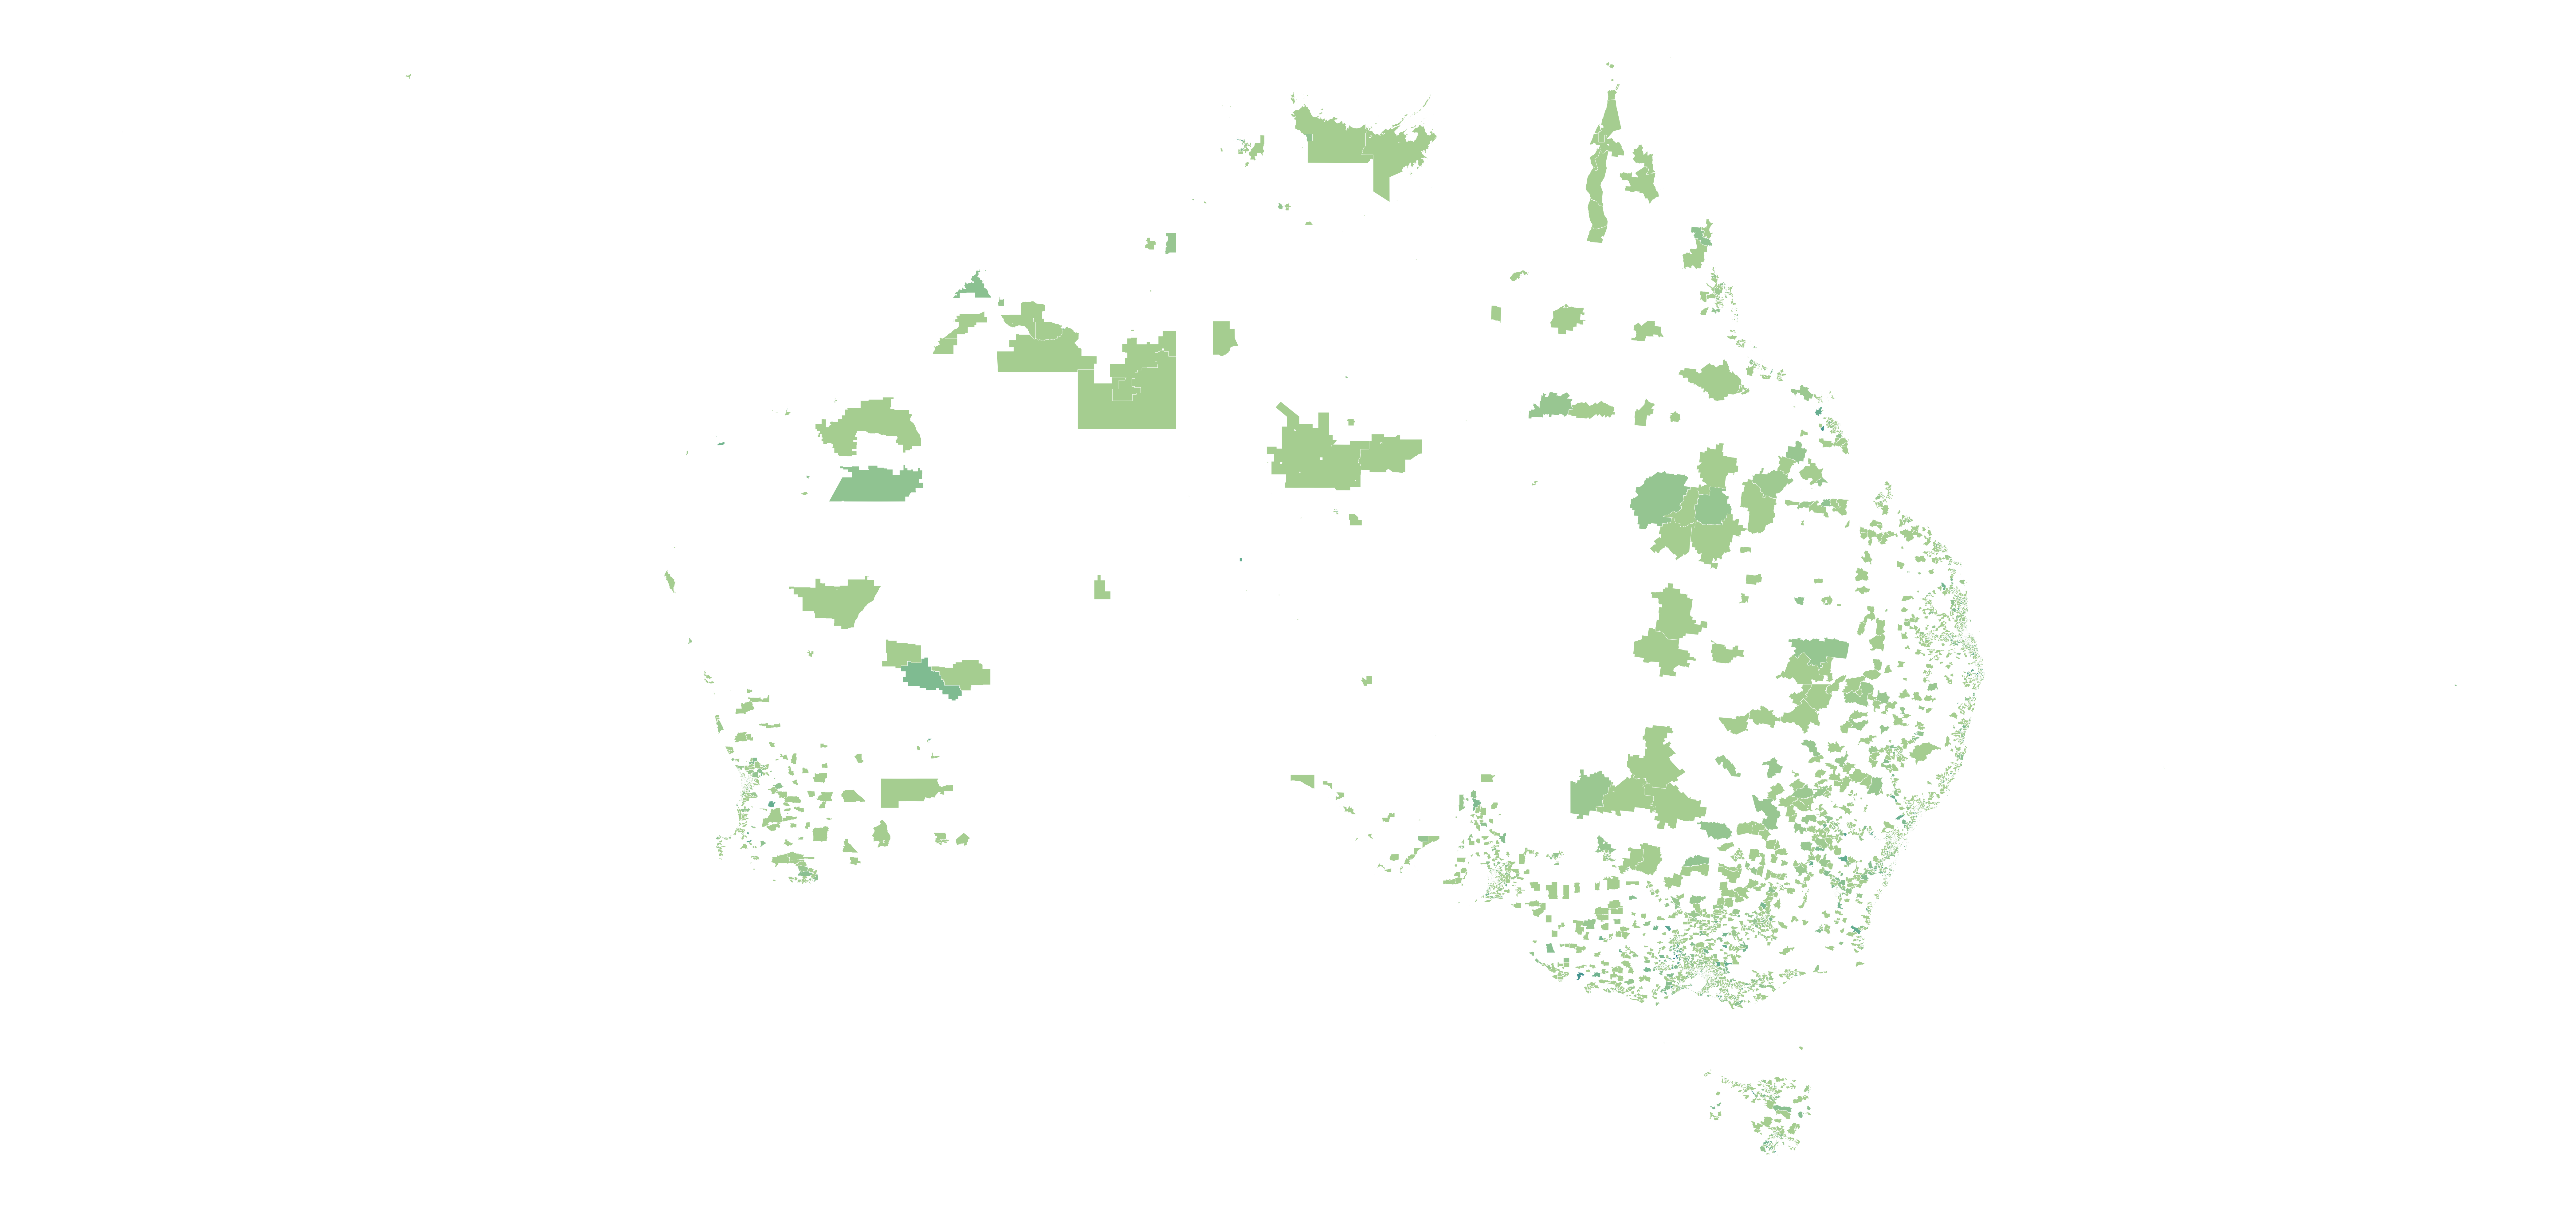

In [81]:
fig, ax = plt.subplots(
    figsize=(150, 150)
)

mapdata_burbs.plot(
    "same-sex",
    cmap="crest",
    ax=ax
)
ax.set_axis_off()
plt.savefig("./map_gayburbs.jps")